In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import data pulled from boxofficemojo.com on November 15th, 2021
df = pd.read_csv('movies.csv')

df = df[['Release','Opening','Date', 'Distributor']]

def cleaner(string):
    '''
    Parameter: String
    Return: String

    Cleaner takes in a string and returns a string with all punctuation and special characters removed.
    '''
    string = "".join([l for l in string if l not in '!\"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~ ' ])
    return string

#converts the opening weekend revenue from a string to an integer
df['Opening'] = df['Opening'].apply(lambda x: int(cleaner(x)))

In [53]:
df.head(30)

,Release,Opening,Date,Distributor
0,Avengers: Endgame,357115007,"Apr 26, 2019",Walt Disney Studios Motion Pictures
1,Avengers: Infinity War,257698183,"Apr 27, 2018",Walt Disney Studios Motion Pictures
2,Star Wars: Episode VII - The Force Awakens,247966675,"Dec 18, 2015",Walt Disney Studios Motion Pictures
3,Star Wars: Episode VIII - The Last Jedi,220009584,"Dec 15, 2017",Walt Disney Studios Motion Pictures
4,Jurassic World,208806270,"Jun 12, 2015",Universal Pictures
5,The Avengers,207438708,"May 4, 2012",Walt Disney Studios Motion Pictures
6,Black Panther,202003951,"Feb 16, 2018",Walt Disney Studios Motion Pictures
7,The Lion King,191770759,"Jul 19, 2019",Walt Disney Studios Motion Pictures
8,Avengers: Age of Ultron,191271109,"May 1, 2015",Walt Disney Studios Motion Pictures
9,Incredibles 2,182687905,"Jun 15, 2018",Walt Disney Studios Motion Pictures


In [55]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month

df['Year'] = df['Date'].dt.year

#Replace the 3 null Distributors with 'The Weinstein Company'
#df.loc[(df.Distributor == '-'),'Distributor']='The Weinstein Company'

df.loc[(df.Distributor == '-'),'Release']
#df.Distributor.value_counts()

362    Scary Movie 4
683        Halloween
962             1408
Name: Release, dtype: object

In [30]:
df.head(30)

,Release,Opening,Date,Distributor,Month,Year
0,Avengers: Endgame,357115007,2019-04-26,Walt Disney Studios Motion Pictures,4,2019
1,Avengers: Infinity War,257698183,2018-04-27,Walt Disney Studios Motion Pictures,4,2018
2,Star Wars: Episode VII - The Force Awakens,247966675,2015-12-18,Walt Disney Studios Motion Pictures,12,2015
3,Star Wars: Episode VIII - The Last Jedi,220009584,2017-12-15,Walt Disney Studios Motion Pictures,12,2017
4,Jurassic World,208806270,2015-06-12,Universal Pictures,6,2015
5,The Avengers,207438708,2012-05-04,Walt Disney Studios Motion Pictures,5,2012
6,Black Panther,202003951,2018-02-16,Walt Disney Studios Motion Pictures,2,2018
7,The Lion King,191770759,2019-07-19,Walt Disney Studios Motion Pictures,7,2019
8,Avengers: Age of Ultron,191271109,2015-05-01,Walt Disney Studios Motion Pictures,5,2015
9,Incredibles 2,182687905,2018-06-15,Walt Disney Studios Motion Pictures,6,2018


In [ ]:
#Following is a scatterplot where the y-axis is the opening weekend revenue in $10 Million and the x-axis is the month the movie was released
#The plot suggests that movies released around June and November tend to make more money in their opening weekends.
fig, ax = plt.subplots()
ax.scatter(x=df['Month'],y=df['Opening'], alpha = 0.25)

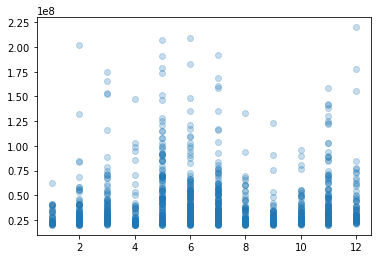

In [32]:
#I created the dataset below to remove any existing outliers to get a closer look at the rest of the data
outlier_removed_df = df[df['Opening']<247966675]

fig1, ax1 = plt.subplots()
ax1.scatter(x=outlier_removed_df['Month'],y=outlier_removed_df['Opening'], alpha = 0.25)

In [33]:
#To get a better idea of which months typically have a higher revenue, I created a new dataframe monthly_mean_df which contains the mean opening weekend revenue for each month (minus outliers)
monthly_mean_df = outlier_removed_df[['Month','Opening']]

monthly_mean_df = monthly_mean_df.groupby(by='Month').mean()
monthly_mean_df.sort_values(by='Opening',ascending=False)

,Opening
Month,
5,6.174410e+07
11,4.697836e+07
7,4.575836e+07
6,4.568194e+07
12,4.546475e+07
3,4.378538e+07
2,3.724750e+07
4,3.590454e+07
10,3.546367e+07


In [ ]:
#As seen above, May, November and July have the highest Mean revenue.
#Because Mean can be skewed, I chose to create violin plots for each month to more accurately depict the distribution of the data.

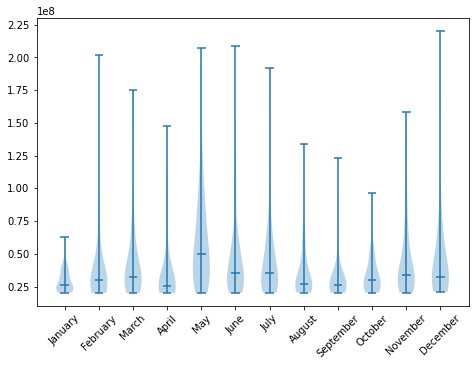

In [35]:
#Create a Series for each month's opening data

def create_violin_plots(dataframe):
	'''
	parameter: dataframe: DataFrame, ax_tuple: Tuple[Axes]
	returns: violinplot

	Takes in a DataFrame object and a tuple of Axes objects and returns a violin plot showing the distribution
	of the Opening Weekend Revenue for each film separated by month.
	'''
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	
	month_opening_df = dataframe[['Month','Opening']]
	data_to_plot = []
	
	# Creates figure instance
	#fig = plt.figure()
	
	# Creates an axes instance
	ax=plt.figure().add_axes([0,0,1,1])

	for i in range(1,13):
		#creates a series containing the opening data for only one month and adds it to the list of plot data
		new_series = month_opening_df.loc[(month_opening_df.Month==i),'Opening']
		data_to_plot.append(new_series)

	# Creates Plots
	ax.violinplot(data_to_plot,showmedians=True)
	plt.xticks(list(range(1,13)), rotation=45)
	ax.set_xticklabels(month_list)
	plt.tight_layout
	plt.show()

create_violin_plots(outlier_removed_df)

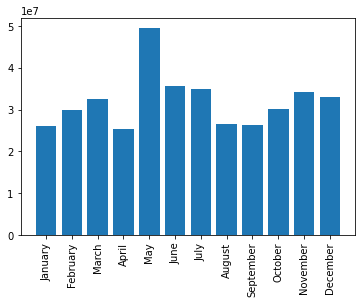

In [20]:
#As can be seen in the violin plots, May, November, July and June have the highest Median Opening Weekend Revenue.
#Movies released during these months generally made more money upon release.
monthly_median_df = df[['Month','Opening','Year']]

#monthly_median_df = monthly_mean_df.groupby(by='Month', as_index=False).median().sort_values(by='Opening', ascending=False).reset_index()

monthly_median_df = monthly_median_df.groupby(by='Month', as_index=False).median().reset_index()


monthly_median_df

def median_bar_graph(dataframe):
	'''
	Parameter: dataframe - DataFrame Object
	Return: Bar Graph
	
	Create a bar graph of the median box office revenue for each month's releases.
	'''
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	
	x_values = dataframe['Month']
	y_values = dataframe['Opening']

	ax = plt.subplot()
	ax.bar(x_values,height=y_values)

	plt.xticks(list(range(1,13)), rotation=90)
	ax.set_xticklabels(month_list)
	
	plt.tight_layout
	plt.show()

median_bar_graph(monthly_median_df)

In [7]:
df['Month'].value_counts()
#movies released in May, June, July and November had the most representation in this data set.
#This probably means that studios look at historical sales data, see that movies typically make more money when released during these months
#and decide to release their films accordingly.

6     143
7     129
11    118
5     110
3      85
2      72
8      69
12     63
10     63
4      58
9      54
1      36
Name: Month, dtype: int64

In [12]:
monthly_median_df

,index,Month,Opening,Year
0,0,1,26081953.0,2010.5
1,1,2,29899879.5,2011.5
2,2,3,32528016.0,2011.0
3,3,4,25403799.5,2011.0
4,4,5,49559550.0,2009.0
5,5,6,35677125.0,2008.0
6,6,7,35055556.0,2009.0
7,7,8,26681262.0,2010.0
8,8,9,26248087.0,2013.0
9,9,10,30053954.0,2011.0


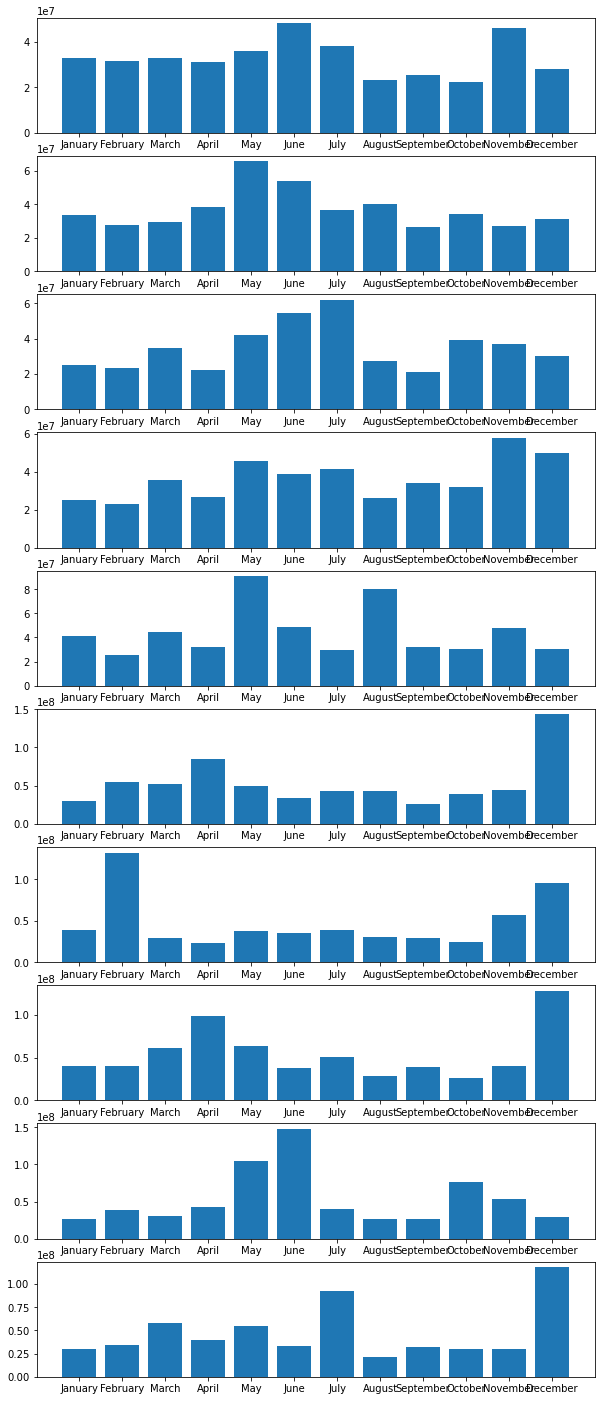

In [24]:
def create_year_bargraphs(dataframe):
	'''
	Parameter: dataframe - DataFrame Object
	Return: Bar Graph
	
	Creates bar graphs of the median box office revenue for each
	month's releases for the years 2010-2019.
	'''
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	
	month_year_df = dataframe[['Month','Year','Opening']]
	year_list = [x for x in range(2010,2020)]

	fig, ax_tuple = plt.subplots(nrows=10, ncols=1, figsize = (10,25))

	for i in range(10):
		year_df = month_year_df.loc[(month_year_df.Year==year_list[i]),['Opening','Month']]
		plot_data = []
		for j in range(1,13):
			month_data = year_df.loc[(year_df.Month==j),'Opening']
			plot_data.append(month_data.median())
		ax_tuple[i].bar(month_list,height=plot_data)
			
	plt.setp(ax_tuple, xticks=list(range(0,12)), xticklabels=month_list)
	plt.show()

create_year_bargraphs(df)
	

In [ ]:
def create_year_violinplots(dataframe):
	'''
	parameter: DataFrame
	returns: None

	Takes in a DataFrame object and returns a violin showing the
	distribution Opening Weekend Revenue for each film for the previous decade.
	'''
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	
	month_year_df = dataframe[['Month','Year','Opening']]
	year_list = [x for x in range(2010,2020)]

	fig, ax_tuple = plt.subplots(nrows=10, ncols=1, figsize = (10,25))

	for i in range(10):
		year_df = month_year_df.loc[(month_year_df.Year==year_list[i]),['Opening','Month']]
		plot_data = []
		for j in range(1,13):
			month_data = year_df.loc[(year_df.Month==j),'Opening']
			plot_data.append(month_data)
		ax_tuple[i].violinplot(dataset=plot_data,showmedians=True)
	plt.setp(ax_tuple, xticks=list(range(1,13)), xticklabels=month_list)
	plt.show()

create_year_violinplots(df)

In [49]:
df['Distributor'].value_counts()

Warner Bros.                           166
Universal Pictures                     150
Walt Disney Studios Motion Pictures    142
Twentieth Century Fox                  132
Sony Pictures Entertainment (SPE)      108
Paramount Pictures                     100
Lionsgate                               47
Screen Gems                             23
DreamWorks                              22
New Line Cinema                         20
DreamWorks Distribution                 14
Metro-Goldwyn-Mayer (MGM)               13
Revolution Studios                      10
TriStar Pictures                         8
Summit Entertainment                     6
Dimension Films                          5
Miramax                                  5
STX Entertainment                        3
Relativity Media                         3
Focus Features                           3
The Weinstein Company                    3
-                                        3
FilmDistrict                             2
Columbia Pi

In [38]:
def create_studio_df_list(dataframe):
	'''
	parameter: DataFrame
	returns: List of DataFrame Objects

	Takes in a DataFrame object and returns a list of DataFrame objects containing only data for one studio.
	'''
	studio_list = ['Warner Bros.','Universal Pictures','Walt Disney Studios Motion Pictures','Twentieth Century Fox']
	df_list = []
	for studio in studio_list:
		df_list.append(dataframe[dataframe['Distributor']==studio])
	return df_list

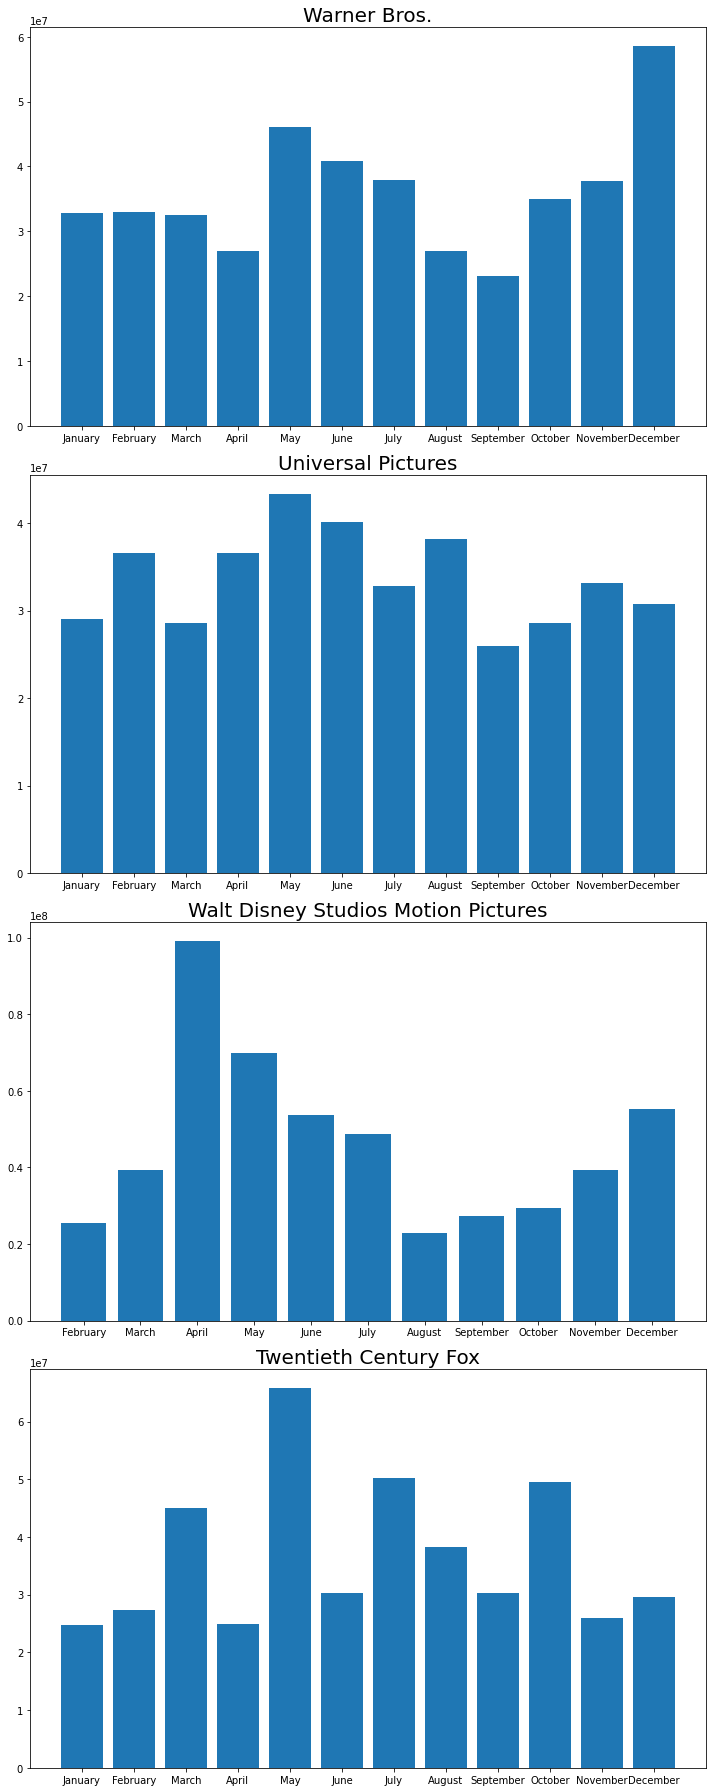

In [41]:
def create_studio_bargraphs(dataframe):
	'''
	parameter: DataFrame
	returns: None

	Takes in a DataFrame object and returns a scatterplot showing the
	Opening Weekend Revenue for each film for the past 10 years.
	'''
	studio_list = ['Warner Bros.','Universal Pictures','Walt Disney Studios Motion Pictures','Twentieth Century Fox']
	month_list = ['January','February','March','April',
	              'May', 'June', 'July', 'August',
				  'September', 'October', 'November', 'December']
	df_list = create_studio_df_list(dataframe)

	fig, ax_tuple = plt.subplots(nrows=4, ncols=1, figsize = (10,25))
	
	for i in range(4):
		plot_data = []
		for month in range(1,13):
			month_data = df_list[i].loc[(df_list[i].Month==month),'Opening']
			plot_data.append(month_data.median())
		ax_tuple[i].bar(month_list,height=plot_data)
		ax_tuple[i].set_title(studio_list[i], fontsize = 20)
		
	
	plt.tight_layout()
	plt.show()

create_studio_bargraphs(df)